In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt

def row_num(x=None): return pd.set_option('display.max_rows',x)
def col_num(x=None): return pd.set_option('display.max_columns',x)

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams['axes.unicode_minus'] = False

# 1.DATA LOAD
---

In [3]:
df = pd.read_csv('../data/데이터정제_인구최종.csv', encoding='euc-kr')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   시군구코드            229 non-null    int64 
 1   시도명              229 non-null    object
 2   시군구명             229 non-null    object
 3   2019_노인청소년_예산    229 non-null    int64 
 4   2020_노인청소년_예산    229 non-null    int64 
 5   예산변화량            229 non-null    int64 
 6   2019_전체예산        229 non-null    int64 
 7   2020_전체예산        229 non-null    int64 
 8   2019_총인구         229 non-null    int64 
 9   2020_총인구         229 non-null    int64 
 10  2019_노인1인인구      229 non-null    int64 
 11  2020_노인1인인구      229 non-null    int64 
 12  2019_노인인구        229 non-null    int64 
 13  2020_노인인구        229 non-null    int64 
 14  총복지시설            229 non-null    int64 
 15  노인주거복지시설         229 non-null    int64 
 16  노인의료복지시설         229 non-null    int64 
 17  노인여가복지시설         229 non-null    in

In [4]:
df.iloc[:,19:22].describe()

,노인일자리지원기관,학대피해노인전용쉼터,치매전담형장기요양기관
count,229.000000,229.000000,229.000000
mean,0.803493,0.082969,0.960699
std,0.800650,0.276440,1.528453
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000
max,6.000000,1.000000,10.000000


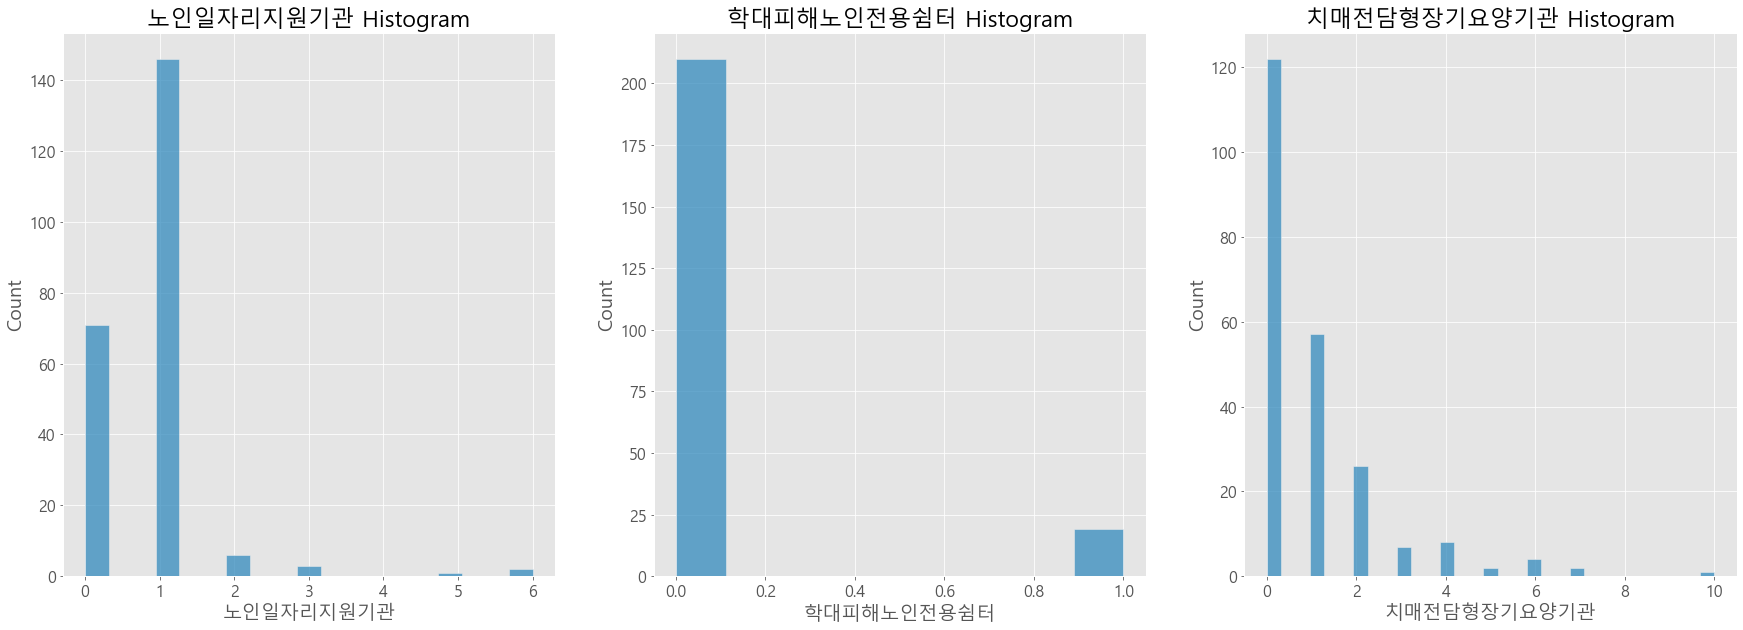

In [5]:
fig, ax = plt.subplots(1,3,figsize=(30,10))
icol = 19
for i in range(3):
    sns.histplot(ax=ax[i], data=df.iloc[:,icol])
    ax[i].set_title(f"{df.columns[icol]} Histogram")
    icol+=1

In [6]:
# 분석에 활용되지 않는 데이터 삭제
df.drop('학대피해노인전용쉼터',axis=1,inplace=True)

In [7]:
df['총복지시설'].describe()

count     229.000000
mean      347.458515
std       200.252044
min        30.000000
25%       198.000000
50%       318.000000
75%       435.000000
max      1234.000000
Name: 총복지시설, dtype: float64

In [8]:
df.head()

,시군구코드,시도명,시군구명,2019_노인청소년_예산,2020_노인청소년_예산,예산변화량,2019_전체예산,2020_전체예산,2019_총인구,2020_총인구,...,재가노인복지시설,노인일자리지원기관,치매전담형장기요양기관,총종사자수,노인주거복지시설종사자수,노인의료복지시설종사자수,노인여가복지시설종사자수,재가노인복지시설종사자수,노인일자리지원기관종사자수,치매전담형장기요양기관종사자수
0,11010,서울특별시,종로구,57821,66194,8373,529565,644867,154969,151291,...,6,1,1,462,14,261,107,66,6,8
1,11020,서울특별시,중구,65016,74703,9687,524387,666269,130957,128744,...,13,0,0,332,62,68,62,140,0,0
2,11030,서울특별시,용산구,68308,77525,9217,519788,686515,227181,225882,...,7,0,0,283,15,138,42,88,0,0
3,11040,서울특별시,성동구,79192,87622,8430,599471,815446,299688,291918,...,20,0,0,595,0,254,82,259,0,0
4,11050,서울특별시,광진구,80799,98774,17975,606302,871393,359766,353967,...,24,1,0,829,76,371,63,308,11,0


In [9]:
df.dtypes

시군구코드               int64
시도명                object
시군구명               object
2019_노인청소년_예산       int64
2020_노인청소년_예산       int64
예산변화량               int64
2019_전체예산           int64
2020_전체예산           int64
2019_총인구            int64
2020_총인구            int64
2019_노인1인인구         int64
2020_노인1인인구         int64
2019_노인인구           int64
2020_노인인구           int64
총복지시설               int64
노인주거복지시설            int64
노인의료복지시설            int64
노인여가복지시설            int64
재가노인복지시설            int64
노인일자리지원기관           int64
치매전담형장기요양기관         int64
총종사자수               int64
노인주거복지시설종사자수        int64
노인의료복지시설종사자수        int64
노인여가복지시설종사자수        int64
재가노인복지시설종사자수        int64
노인일자리지원기관종사자수       int64
치매전담형장기요양기관종사자수     int64
dtype: object

<AxesSubplot:xlabel='총복지시설', ylabel='Count'>

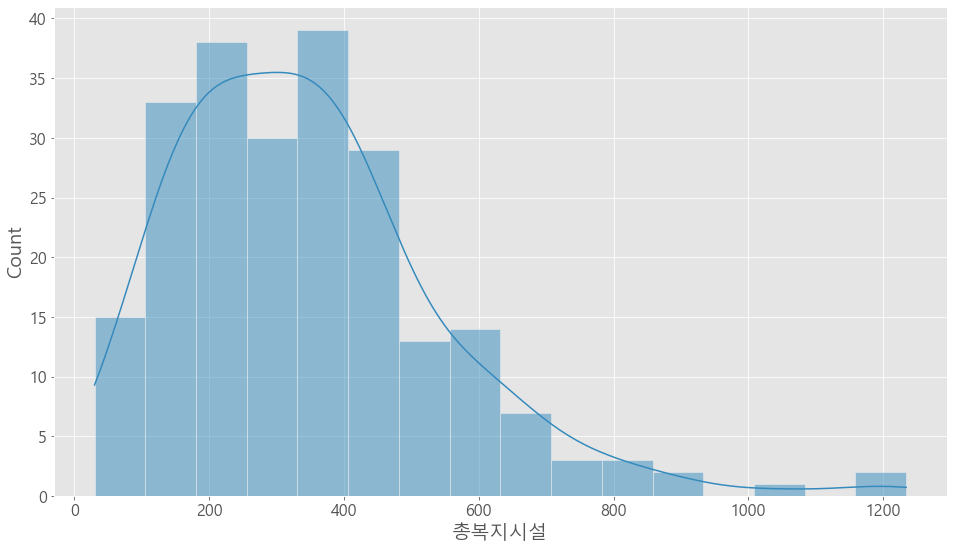

In [10]:
sns.histplot(df['총복지시설'], kde=True)

# 2.데이터셋 살펴보기
---

## 2.1. 통계적 요약
---

In [11]:
# 예산 데이터 요약
df.iloc[:,3:8].describe()

,2019_노인청소년_예산,2020_노인청소년_예산,예산변화량,2019_전체예산,2020_전체예산
count,229.000000,229.000000,229.000000,2.290000e+02,2.290000e+02
mean,93452.344978,107022.598253,13570.253275,8.626660e+05,9.943650e+05
std,60184.802647,69259.111991,11040.745329,5.829622e+05,6.752019e+05
min,6129.000000,4917.000000,-21401.000000,1.957470e+05,2.332000e+05
25%,51856.000000,58349.000000,5596.000000,5.217080e+05,5.744000e+05
50%,79019.000000,87622.000000,11094.000000,6.913710e+05,7.928890e+05
75%,121003.000000,141078.000000,19017.000000,9.670050e+05,1.110601e+06
max,350570.000000,406408.000000,55838.000000,3.734150e+06,4.318930e+06


In [12]:
# 인구 데이터 요약
df.iloc[:,8:14].describe()

,2019_총인구,2020_총인구,2019_노인1인인구,2020_노인1인인구,2019_노인인구,2020_노인인구
count,2.290000e+02,2.290000e+02,229.000000,229.000000,229.000000,229.000000
mean,2.261101e+05,2.263281e+05,6693.655022,7252.013100,33407.895197,35052.030568
std,2.225959e+05,2.238576e+05,4425.314711,4904.576079,24767.418467,26321.440643
min,8.704000e+03,8.444000e+03,445.000000,507.000000,2290.000000,2341.000000
25%,5.088700e+04,5.019600e+04,3528.000000,3759.000000,14984.000000,15423.000000
50%,1.475000e+05,1.455880e+05,5460.000000,5966.000000,26572.000000,27615.000000
75%,3.470320e+05,3.510570e+05,9091.000000,9880.000000,47200.000000,49983.000000
max,1.214986e+06,1.210150e+06,27845.000000,30993.000000,131613.000000,140151.000000


In [13]:
# 복지 서비스 데이터 요약
df.iloc[:,14:].describe()

,총복지시설,노인주거복지시설,노인의료복지시설,노인여가복지시설,재가노인복지시설,노인일자리지원기관,치매전담형장기요양기관,총종사자수,노인주거복지시설종사자수,노인의료복지시설종사자수,노인여가복지시설종사자수,재가노인복지시설종사자수,노인일자리지원기관종사자수,치매전담형장기요양기관종사자수
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000
mean,347.458515,1.668122,24.144105,298.746725,21.052402,0.803493,0.960699,800.593886,14.567686,491.965066,40.144105,240.838428,7.986900,5.091703
std,200.252044,2.161036,26.636791,179.560420,19.508587,0.800650,1.528453,729.386173,22.996396,518.970893,48.833240,253.684230,11.835673,9.274345
min,30.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,23.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000
25%,198.000000,0.000000,8.000000,157.000000,8.000000,0.000000,0.000000,323.000000,0.000000,177.000000,9.000000,73.000000,0.000000,0.000000
50%,318.000000,1.000000,16.000000,276.000000,14.000000,1.000000,0.000000,595.000000,9.000000,306.000000,25.000000,153.000000,6.000000,0.000000
75%,435.000000,2.000000,30.000000,395.000000,27.000000,1.000000,1.000000,970.000000,18.000000,616.000000,55.000000,321.000000,10.000000,7.000000
max,1234.000000,9.000000,179.000000,1062.000000,118.000000,6.000000,10.000000,4501.000000,166.000000,3816.000000,329.000000,1650.000000,120.000000,62.000000


## 2.2. 분포 시각화
---

In [14]:
import warnings
warnings.simplefilter('ignore')

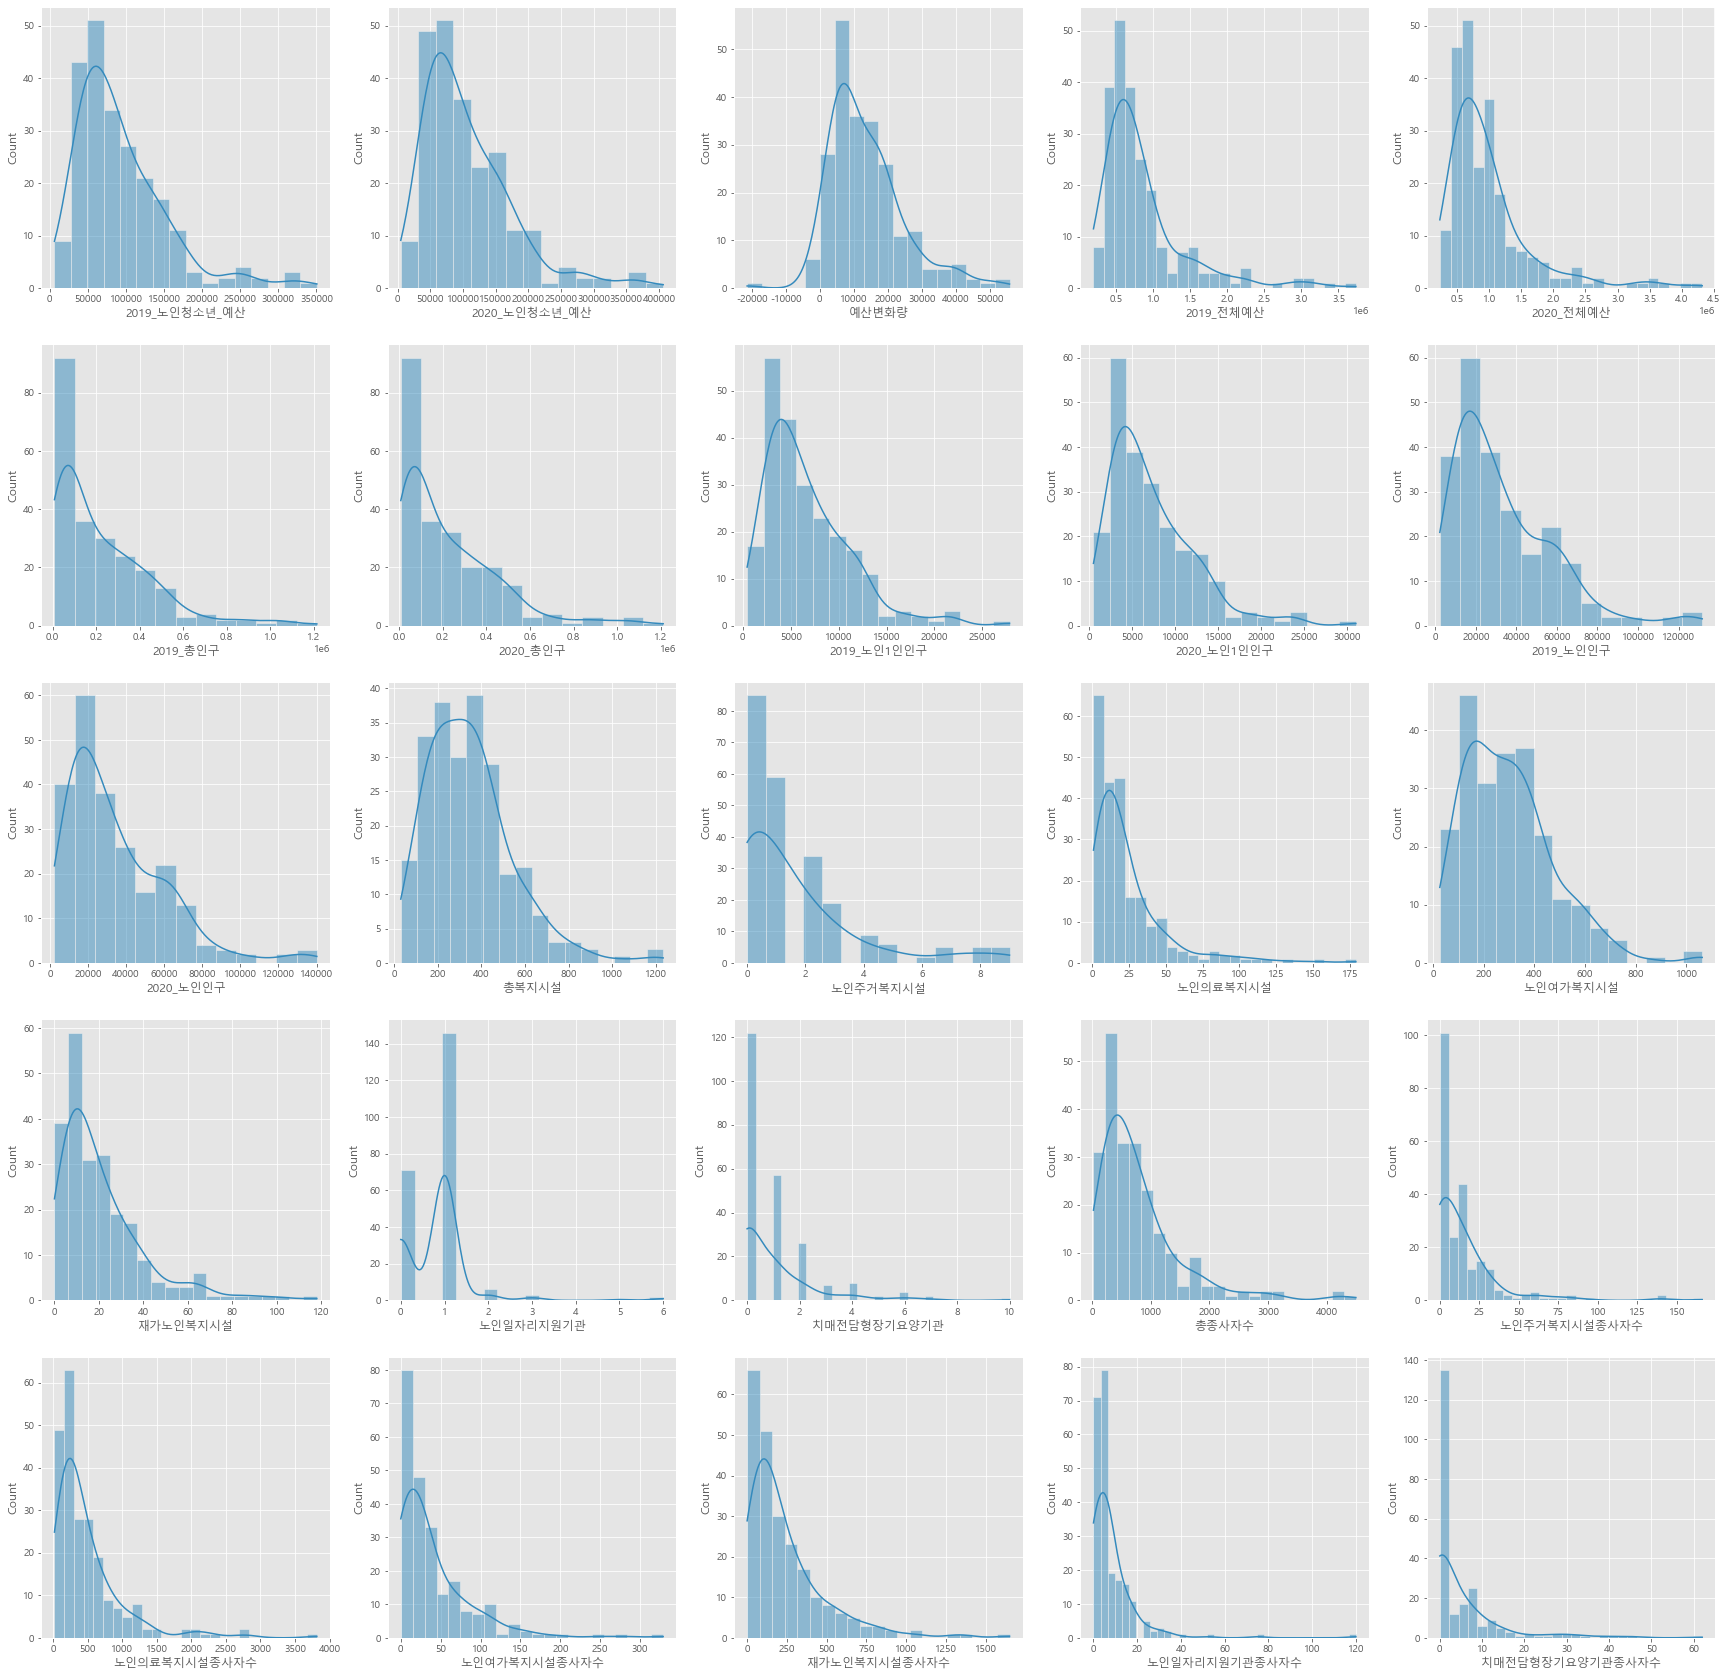

In [15]:
# plt.rcParams['figure.figsize'] = (30,20)
plt.rcParams['font.size'] = 10
fig, ax = plt.subplots(5,5,figsize=(30,30))
num_col = 3
for i in range(0,5):
    for j in range(0,5):
        # ax[i][j].set_title(df.columns[num_col]+'의 분포', size=20)
        # sns.distplot(ax=ax[i][j],x=df.iloc[:,num_col])
        sns.histplot(ax=ax[i][j],x=df.iloc[:,num_col],kde=True)
        num_col+=1
plt.show()

- 전반적으로 오른쪽으로 꼬리가 긴 형태
- 항목별로 세부적인 값 자체는 다르겠지만, 소수의 특정 지역이 각 컬럼에서 큰 값들을 갖는 것을 의미

## 2.3. 관계 시각화
---

In [16]:
df_cor = df.iloc[:,3:].corr()
row_num(10)
col_num(10)
df_cor

,2019_노인청소년_예산,2020_노인청소년_예산,예산변화량,2019_전체예산,2020_전체예산,...,노인의료복지시설종사자수,노인여가복지시설종사자수,재가노인복지시설종사자수,노인일자리지원기관종사자수,치매전담형장기요양기관종사자수
2019_노인청소년_예산,1.000000,0.995255,0.792129,0.828768,0.874511,...,0.772597,0.624185,0.589842,0.306804,0.359787
2020_노인청소년_예산,0.995255,1.000000,0.847757,0.816593,0.864528,...,0.772048,0.630040,0.592564,0.311279,0.363426
예산변화량,0.792129,0.847757,1.000000,0.604786,0.656133,...,0.631548,0.549739,0.501863,0.280235,0.318536
2019_전체예산,0.828768,0.816593,0.604786,1.000000,0.983439,...,0.736379,0.502166,0.452133,0.256821,0.331258
2020_전체예산,0.874511,0.864528,0.656133,0.983439,1.000000,...,0.757599,0.565229,0.493497,0.251915,0.352705
...,...,...,...,...,...,...,...,...,...,...,...
노인의료복지시설종사자수,0.772597,0.772048,0.631548,0.736379,0.757599,...,1.000000,0.561205,0.501057,0.249754,0.388316
노인여가복지시설종사자수,0.624185,0.630040,0.549739,0.502166,0.565229,...,0.561205,1.000000,0.424277,0.246638,0.336160
재가노인복지시설종사자수,0.589842,0.592564,0.501863,0.452133,0.493497,...,0.501057,0.424277,1.000000,0.164174,0.248727
노인일자리지원기관종사자수,0.306804,0.311279,0.280235,0.256821,0.251915,...,0.249754,0.246638,0.164174,1.000000,0.121759


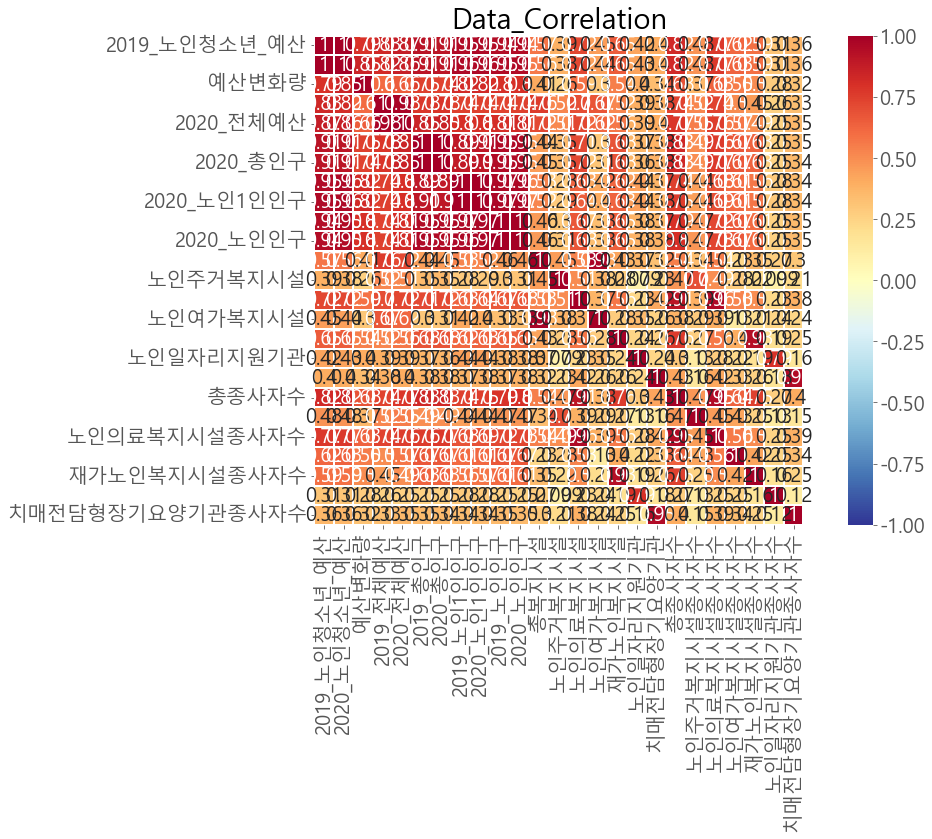

In [17]:
# 각 컬럼 별 히트맵
plt.rcParams['font.size'] = 20
plt.title('Data_Correlation')
color_map = plt.cm.RdYlBu_r
plt.rcParams['figure.figsize'] = (30,30)
sns.heatmap(df_cor,
            annot=True,
            linewidth = 0.05,
            vmax = 1.0,
            vmin = -1.0,
            square=True,
            cmap=color_map)
plt.show()

- 전체적으로 음의 상관관계는 나타나지 않음
- 인구와 예산은 전반적으로 강한 양의 상관 관계를 보임
- 각 종류별 복지시설과 종사자수는 의외로 강한 양의 상관 관계를 보이지 않음

# 3.핸들링 데이터 EDA
---

In [18]:
df_handle = df.iloc[:,:3].copy()
df_handle['지역명'] = df_handle['시도명']+" "+df_handle['시군구명']
df_handle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구코드   229 non-null    int64 
 1   시도명     229 non-null    object
 2   시군구명    229 non-null    object
 3   지역명     229 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.3+ KB


In [19]:
# 노인 인구비, 노인 1인당 할당예산, 노인 복지 예산비 살펴보기
df_handle['노인인구비'] = df['2020_노인인구'].values/df['2020_총인구'].values # 노인인구비율
df_handle['노인1인할당예산'] = df['2020_노인인구'].values/df['2020_노인청소년_예산'] # 노인 1인당 할당 예산
df_handle['노인복지예산비'] = df['2020_노인청소년_예산'].values/df['2020_전체예산'] # 노인 복지 예산비
df_handle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구코드     229 non-null    int64  
 1   시도명       229 non-null    object 
 2   시군구명      229 non-null    object 
 3   지역명       229 non-null    object 
 4   노인인구비     229 non-null    float64
 5   노인1인할당예산  229 non-null    float64
 6   노인복지예산비   229 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 12.6+ KB


In [20]:
# 파생변수 요약
df_handle.iloc[:,4:].describe()

,노인인구비,노인1인할당예산,노인복지예산비
count,229.000000,229.000000,229.000000
mean,0.215815,0.332744,0.111609
std,0.090537,0.350232,0.040126
min,0.075784,0.186710,0.004879
25%,0.139856,0.249729,0.087727
50%,0.188780,0.297864,0.097944
75%,0.288236,0.346840,0.132375
max,0.429778,5.378890,0.222179


In [21]:
print(f"평균보다 많음 : {df_handle.loc[df_handle['노인복지예산비']>=df_handle['노인복지예산비'].mean()]['시군구코드'].count()}")
print(f"평균보다 적음 : {df_handle.loc[df_handle['노인복지예산비']<df_handle['노인복지예산비'].mean()]['시군구코드'].count()}")

평균보다 많음 : 81
평균보다 적음 : 148


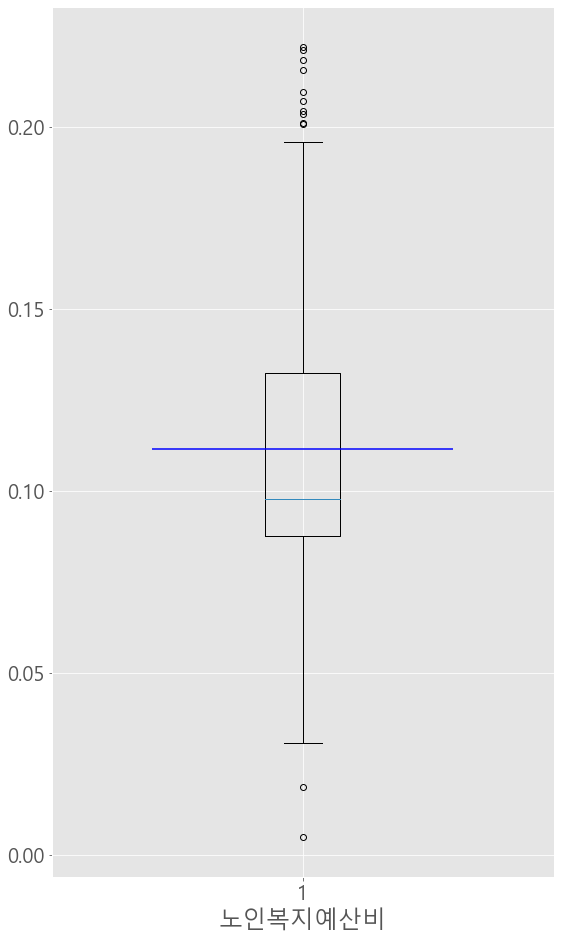

In [22]:
plt.rcParams['figure.figsize']=(9,16)
plt.boxplot(df_handle.iloc[:,6])
plt.hlines(y=df_handle.iloc[:,6].mean(),xmin=0.7,xmax=1.3, color='blue')
plt.xlabel('노인복지예산비')
plt.show()

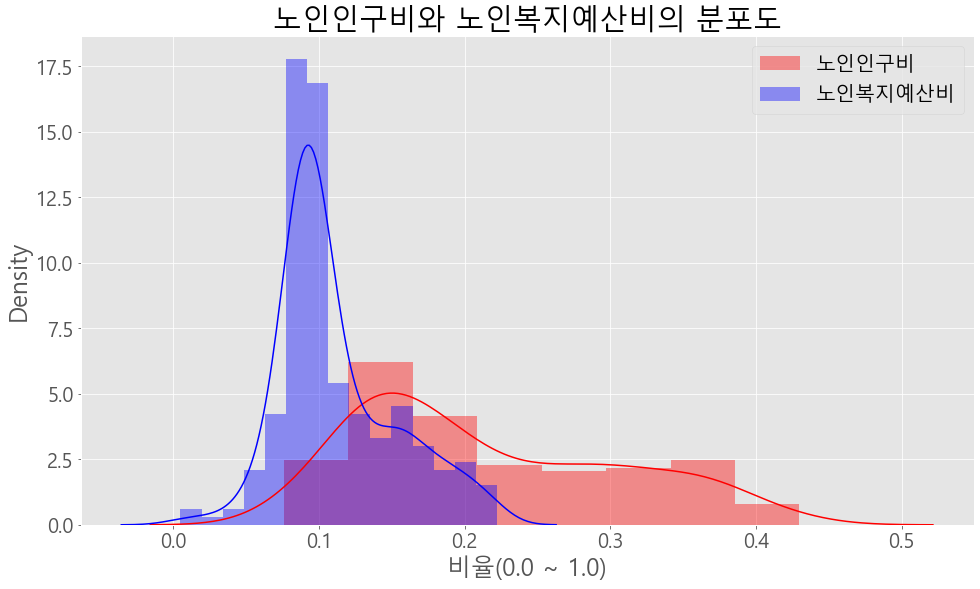

In [23]:
plt.rcParams['figure.figsize'] = (16,9)

plt.title('노인인구비와 노인복지예산비의 분포도')
sns.distplot(df_handle['노인인구비'],color='red',label='노인인구비')
sns.distplot(df_handle['노인복지예산비'],color='blue',label='노인복지예산비')
plt.xlabel('비율(0.0 ~ 1.0)')
plt.legend()
plt.show()

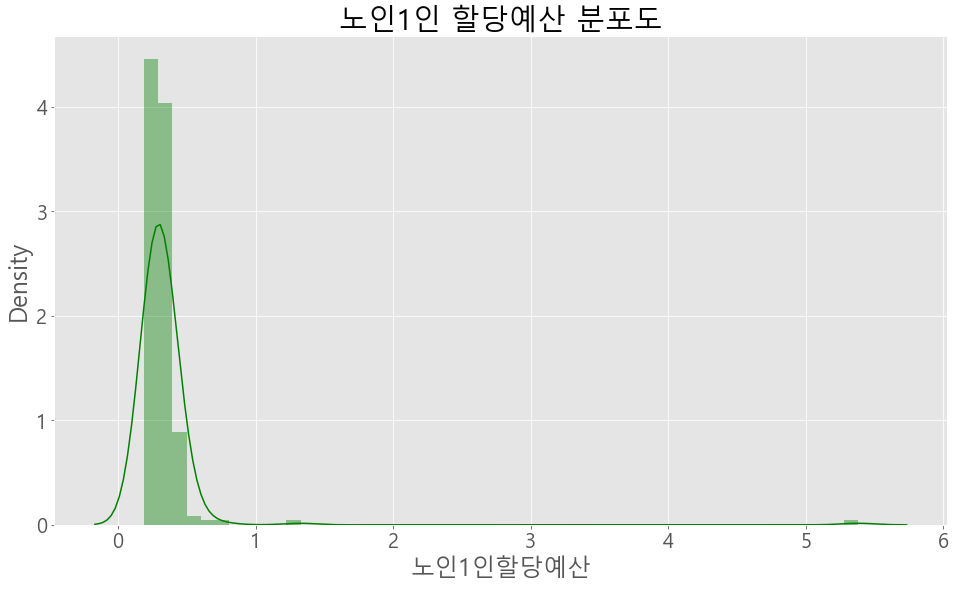

In [24]:
plt.title('노인1인 할당예산 분포도')
sns.distplot(df_handle['노인1인할당예산'],color='green')
plt.show()

# 4.지표값 확인해보기
---
- 지표 계산 수식을 엑셀과 태블로에서 계산
- 저장된 지표값 불러오기

In [25]:
# df_score = pd.read_csv('./예산_복지서비스_평가지표.csv',encoding='euc-kr')
df_score = pd.read_csv('../data/예산인구종합평가지표_정규화추가.csv',encoding='euc-kr')
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   시군구코드          229 non-null    int64  
 1   시도명            229 non-null    object 
 2   시군구명           229 non-null    object 
 3   2019_노인청소년_예산  229 non-null    int64  
 4   2020_노인청소년_예산  229 non-null    int64  
 5   2019_전체예산      229 non-null    int64  
 6   2020_전체예산      229 non-null    int64  
 7   2019_총인구       229 non-null    int64  
 8   2020_총인구       229 non-null    int64  
 9   2019_노인인구      229 non-null    int64  
 10  2020_노인인구      229 non-null    int64  
 11  예산인구평가지표       229 non-null    float64
 12  스케일링된 민맥스      229 non-null    float64
 13  LHIi           229 non-null    float64
 14  LMIi           229 non-null    float64
 15  LLIi           229 non-null    float64
 16  LSIi           229 non-null    float64
 17  복지서비스평가지표      229 non-null    float64
 18  복지민맥      

In [26]:
# 데이터 생김새
df_score.head() # 정규화되어 있지 않음

,시군구코드,시도명,시군구명,2019_노인청소년_예산,2020_노인청소년_예산,...,LLIi,LSIi,복지서비스평가지표,복지민맥,종합평점
0,31100,경기도,고양시,309926,359683,...,2.883547,0.531228,12.664893,100.000021,71.533381
1,38030,경상남도,진주시,136255,172358,...,2.739271,1.814547,6.359357,61.103941,66.947561
2,31190,경기도,용인시,243498,272537,...,3.001383,2.632478,11.316128,91.680084,66.877064
3,31010,경기도,수원시,319030,360022,...,3.138880,0.688927,11.177285,90.823622,64.658587
4,35030,전라북도,익산시,174702,212776,...,1.411789,0.994527,6.370933,61.175349,63.770766


## 4.1.Min-Max Sclae
---
- 평가지표의 점수화를 위해 최대 최소 표준화 수행

In [27]:
def min_max_scaler(arr):
    x_min, x_max = arr.min(), arr.max()
    return (arr-x_min)/(x_max-x_min)

df_score['복지서비스평가지표_MMS']=min_max_scaler(df_score['복지서비스평가지표'])*100
df_score['예산인구평가지표_MMS']=min_max_scaler(df_score['예산인구평가지표'])*100

In [28]:
df_score.head()

,시군구코드,시도명,시군구명,2019_노인청소년_예산,2020_노인청소년_예산,...,복지서비스평가지표,복지민맥,종합평점,복지서비스평가지표_MMS,예산인구평가지표_MMS
0,31100,경기도,고양시,309926,359683,...,12.664893,100.000021,71.533381,100.000000,55.682459
1,38030,경상남도,진주시,136255,172358,...,6.359357,61.103941,66.947561,61.103926,74.027073
2,31190,경기도,용인시,243498,272537,...,11.316128,91.680084,66.877064,91.680064,52.636774
3,31010,경기도,수원시,319030,360022,...,11.177285,90.823622,64.658587,90.823603,50.197406
4,35030,전라북도,익산시,174702,212776,...,6.370933,61.175349,63.770766,61.175334,66.596165


## 4.2.종합평가지표
---
- 종합 평가 지표는 복지서비스 평가지표와 예산 인구 평가지표의 조화평균을 활용
- 스케일링된 평가지표의 조화평균이기에 최종 결과는 스케일링하지 않음

In [29]:
df_score['종합평가지표'] = (2*df_score['복지서비스평가지표_MMS']*df_score['예산인구평가지표_MMS'])/(df_score['복지서비스평가지표_MMS']+df_score['예산인구평가지표_MMS'])
df_score.head()

,시군구코드,시도명,시군구명,2019_노인청소년_예산,2020_노인청소년_예산,...,복지민맥,종합평점,복지서비스평가지표_MMS,예산인구평가지표_MMS,종합평가지표
0,31100,경기도,고양시,309926,359683,...,100.000021,71.533381,100.000000,55.682459,71.533376
1,38030,경상남도,진주시,136255,172358,...,61.103941,66.947561,61.103926,74.027073,66.947552
2,31190,경기도,용인시,243498,272537,...,91.680084,66.877064,91.680064,52.636774,66.877058
3,31010,경기도,수원시,319030,360022,...,90.823622,64.658587,90.823603,50.197406,64.658582
4,35030,전라북도,익산시,174702,212776,...,61.175349,63.770766,61.175334,66.596165,63.770757


In [30]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   시군구코드          229 non-null    int64  
 1   시도명            229 non-null    object 
 2   시군구명           229 non-null    object 
 3   2019_노인청소년_예산  229 non-null    int64  
 4   2020_노인청소년_예산  229 non-null    int64  
 5   2019_전체예산      229 non-null    int64  
 6   2020_전체예산      229 non-null    int64  
 7   2019_총인구       229 non-null    int64  
 8   2020_총인구       229 non-null    int64  
 9   2019_노인인구      229 non-null    int64  
 10  2020_노인인구      229 non-null    int64  
 11  예산인구평가지표       229 non-null    float64
 12  스케일링된 민맥스      229 non-null    float64
 13  LHIi           229 non-null    float64
 14  LMIi           229 non-null    float64
 15  LLIi           229 non-null    float64
 16  LSIi           229 non-null    float64
 17  복지서비스평가지표      229 non-null    float64
 18  복지민맥      

In [31]:
df_score.describe()

,시군구코드,2019_노인청소년_예산,2020_노인청소년_예산,2019_전체예산,2020_전체예산,...,복지민맥,종합평점,복지서비스평가지표_MMS,예산인구평가지표_MMS,종합평가지표
count,229.000000,229.000000,229.000000,2.290000e+02,2.290000e+02,...,229.000000,229.000000,229.000000,229.000000,229.000000
mean,29553.187773,93452.344978,107022.598253,8.626660e+05,9.943650e+05,...,21.875871,26.859303,21.875862,54.539219,26.859293
std,8335.456915,60184.802647,69259.111991,5.829622e+05,6.752019e+05,...,17.573760,14.437669,17.573758,15.952684,14.437670
min,11010.000000,6129.000000,4917.000000,1.957470e+05,2.332000e+05,...,0.000006,0.000000,0.000000,0.000000,0.000000
25%,23310.000000,51856.000000,58349.000000,5.217080e+05,5.744000e+05,...,10.395891,15.849212,10.395883,45.628878,15.849203
50%,32320.000000,79019.000000,87622.000000,6.913710e+05,7.928890e+05,...,17.914174,25.379177,17.914165,60.053582,25.379166
75%,36330.000000,121003.000000,141078.000000,9.670050e+05,1.110601e+06,...,27.584994,34.733862,27.584984,65.228426,34.733855
max,39020.000000,350570.000000,406408.000000,3.734150e+06,4.318930e+06,...,100.000021,71.533381,100.000000,100.000000,71.533376


In [32]:
df_score[['예산인구평가지표','복지서비스평가지표']].describe()

,예산인구평가지표,복지서비스평가지표
count,229.000000,2.290000e+02
mean,-0.062708,1.310055e-11
std,0.113136,2.848924e+00
min,-0.449500,-3.546349e+00
25%,-0.125900,-1.861047e+00
50%,-0.023600,-6.422403e-01
75%,0.013100,9.255195e-01
max,0.259700,1.266489e+01


In [33]:
print(df_score['예산인구평가지표'].var())
print(df_score['복지서비스평가지표'].var())

0.012799853271278633
8.116370661411029


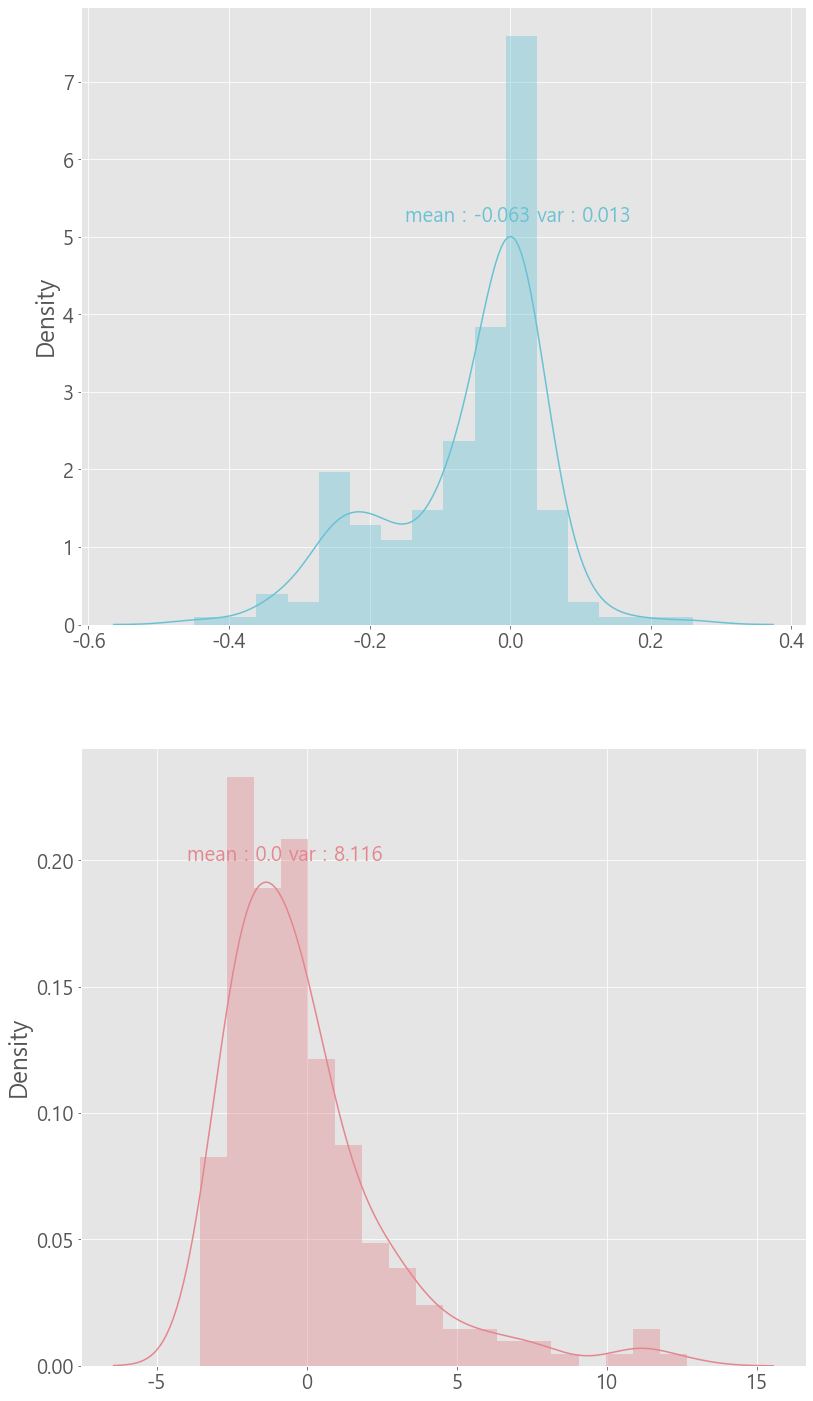

In [34]:
fig,ax=plt.subplots(2,1,figsize=(13,25))
sns.distplot(ax=ax[0], x=df_score['예산인구평가지표'], color='#69C2D4', label='예산평가지표')
# ax[0].set_title("예산 인구 평가 지표 분포도")
ax[0].text(x=-0.15, y=5.2, color = '#69C2D4',
           s=f"mean : {round(df_score['예산인구평가지표'].mean(),3)} var : {round(df_score['예산인구평가지표'].var(),3)}")
sns.distplot(ax=ax[1], x=df_score['복지서비스평가지표'], color='#E3868E', label='복지서비스평가지표')
# ax[1].set_title("복지 서비스 평가 지표 분포도")
ax[1].text(x=-4, y=0.2, color = '#E3868E',
           s=f"mean : {round(df_score['복지서비스평가지표'].mean(),3)} var : {round(df_score['복지서비스평가지표'].var(),3)}")
plt.savefig('../data/result_distribute.png')
plt.show()

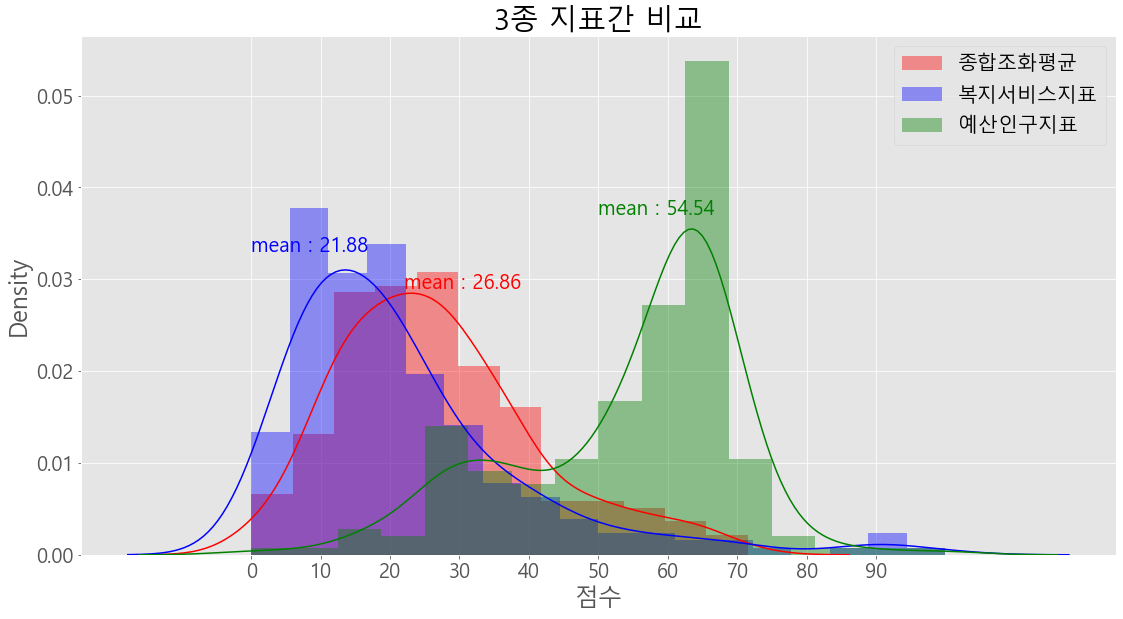

In [35]:
# 지표 간 비교
score_mean = df_score[['복지서비스평가지표_MMS','예산인구평가지표_MMS']].mean(axis=1)

plt.subplot(1, 1, 1)  
plt.title('3종 지표간 비교')
# sns.distplot(score_mean, color = 'orange',label='종합산술평균')
sns.distplot(df_score['종합평가지표'], color = 'red',label='종합조화평균')
plt.text(x=22,y=0.029, color='red',
         s=f"mean : {round(df_score['종합평가지표'].mean(),2)}")
sns.distplot(df_score['복지서비스평가지표_MMS'], color = 'blue',label='복지서비스지표')
plt.text(x=0,y=0.033, color='blue',
         s=f"mean : {round(df_score['복지서비스평가지표_MMS'].mean(),2)}")
sns.distplot(df_score['예산인구평가지표_MMS'], color = 'green',label='예산인구지표')
plt.text(x=50,y=0.037, color='green',
         s=f"mean : {round(df_score['예산인구평가지표_MMS'].mean(),2)}")
plt.xlabel('점수')
plt.xticks([i for i in range(0,100,10)])
plt.legend()
plt.tight_layout()
plt.show()